In [1]:
!pip install bing-image-downloader

In [2]:
!ls 

drive  sample_data


In [3]:
cd /content/drive/My Drive/miniprojectimages

/content/drive/My Drive/miniprojectimages


In [4]:
!ls

In [5]:
!mkdir images

In [6]:
cd images

/content/drive/My Drive/miniprojectimages/images


In [7]:
from bing_image_downloader import downloader
downloader.download("tiger",limit = 10, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/UKwY7yV5sYo/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/9/99/Male_Tiger_Ranthambhore.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/GwRvM7Z-zSY/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/Tec5bp90C8k/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Bengal_tiger_(Panthera_tigris_tigris)_female_2.jpg/1200px-Bengal_tiger_(Panthera_tigris_tigris)_female_2.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Bengal_tiger_(Panthera_tigris_tigris)_female_2.jpg/1200px-Bengal_tiger_(Panthera_tigris_tigris)_female_2.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Bengal_tiger_(P

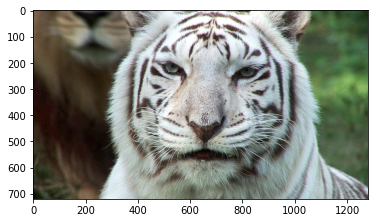

In [13]:
path = '/content/drive/My Drive/miniprojectimages/images/images/tiger/Image_1.jpg'
import cv2
import matplotlib.pyplot as plt

i = cv2.imread(path)
i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)
plt.show()

In [14]:
from bing_image_downloader import downloader
downloader.download("peacock",limit = 10, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/qDvFdj-pFMc/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/Wa5IBzO2TSM/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-oXClIpc-XYQ/URo2LN8Nw_I/AAAAAAAATIA/2h4CAsQtFPQ/s1600/Peacock+Wallpapers+03.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/LJaBH31Temg/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.ytimg.com/vi/9tmTskfBJns/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://s-media-cache-ak0.pinimg.com/736x/2d/45/e7/2d45e7310084118975573cfc3cd50b7e--peacock-colors-peacock-feathers.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.ytimg.com/vi/a-8oo8UFP7I/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://s-media-cache-ak0.pinimg.com/736x/64/7a/

In [15]:
import os

path = '/content/drive/My Drive/miniprojectimages/images/images/tiger'

for filename in os.listdir(path):
    i =cv2.imread(os.path.join(path,filename))
    i =cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    print(i.shape)

(720, 1280, 3)
(828, 1141, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)


In [16]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np

In [18]:
target = []  #list of target(output)
flat_data = []  #image pixel in flatten style
images = []

path = '/content/drive/My Drive/miniprojectimages/images/images'

for dirpath,dirnames,filenames in os.walk(path):
    for filename in filenames:
        
        category = dirpath.split('/')[-1]
        
        target.append(category)
        img =imread(f'{path}/{category}/{filename}')
        img_resize = resize(img,(50,50,3)) #Scaling down
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
    
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target)



(20, 7500)
['tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger' 'tiger'
 'tiger' 'peacock' 'peacock' 'peacock' 'peacock' 'peacock' 'peacock'
 'peacock' 'peacock' 'peacock' 'peacock']


In [19]:
import pandas as pd

df =pd.DataFrame(flat_data)

df['Target']=target

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.462745,0.368627,0.274510,0.396078,0.314118,0.231765,0.329412,0.262157,0.181765,0.361176,0.298431,0.212157,0.473333,0.403098,0.316824,0.432941,0.373294,0.304706,0.229020,0.197647,0.189412,0.243333,0.221176,0.232941,0.262353,0.246667,0.258431,0.180824,0.165137,0.183098,0.155294,0.139961,0.143529,0.274902,0.251647,0.224314,0.409804,0.378431,0.331373,0.594000,...,0.593529,0.654902,0.650980,0.551490,0.615569,0.631255,0.543922,0.587059,0.610588,0.695294,0.758392,0.797255,0.705882,0.784314,0.796471,0.683725,0.745098,0.742549,0.650980,0.705882,0.697922,0.593333,0.645490,0.637647,0.528588,0.549020,0.550196,0.568902,0.596471,0.600392,0.552941,0.560784,0.572549,0.526275,0.541961,0.558039,0.418863,0.429804,0.434902,tiger
1,0.235294,0.223529,0.208196,0.219608,0.205610,0.193845,0.204784,0.192157,0.173412,0.242594,0.222986,0.205053,0.289333,0.254039,0.238353,0.282314,0.250972,0.227451,0.250980,0.231373,0.211765,0.248992,0.227451,0.209776,0.231373,0.208300,0.188235,0.224667,0.203922,0.180392,0.250980,0.227882,0.210997,0.270588,0.246196,0.226649,0.274510,0.232353,0.204902,0.290196,...,0.348784,0.328314,0.308706,0.479569,0.459961,0.428588,0.559585,0.533238,0.490101,0.572549,0.548157,0.498926,0.414353,0.390824,0.353686,0.168325,0.148718,0.131400,0.184980,0.165373,0.141176,0.211804,0.188275,0.160815,0.171804,0.152196,0.128667,0.390706,0.373569,0.314745,0.284902,0.273137,0.237843,0.225647,0.209331,0.182510,0.442627,0.426941,0.379882,tiger
2,0.000000,0.000000,0.000000,0.003922,0.007451,0.000000,0.150980,0.248431,0.044510,0.349412,0.481176,0.185098,0.403922,0.458824,0.347843,0.430549,0.450980,0.400824,0.465216,0.486275,0.450863,0.481176,0.501373,0.477255,0.505882,0.525490,0.501961,0.529412,0.547843,0.521569,0.512549,0.521216,0.477255,0.517647,0.525490,0.486275,0.490196,0.509804,0.456275,0.454902,...,0.626863,0.490980,0.378431,0.601843,0.488627,0.386667,0.525882,0.462314,0.412157,0.713373,0.661569,0.634118,0.466000,0.446275,0.423922,0.620980,0.566078,0.527451,0.638039,0.500510,0.368510,0.542353,0.419608,0.318471,0.476431,0.376471,0.297686,0.514118,0.404314,0.314118,0.195490,0.154902,0.109804,0.003922,0.003922,0.003529,0.000000,0.000000,0.000000,tiger
3,0.303137,0.205922,0.184667,0.446667,0.290196,0.250980,0.527451,0.339216,0.270588,0.560784,0.376471,0.290196,0.552941,0.364706,0.274510,0.529412,0.332157,0.253725,0.508353,0.329020,0.250980,0.559608,0.383725,0.289020,0.564706,0.384314,0.292941,0.588235,0.413686,0.304706,0.592157,0.423176,0.303882,0.556863,0.375294,0.278431,0.564118,0.379216,0.278431,0.587059,...,0.845882,0.807255,0.740000,0.786667,0.782863,0.679333,0.771373,0.763529,0.658471,0.763529,0.728235,0.658824,0.752941,0.720667,0.646000,0.720980,0.704706,0.609216,0.689020,0.675804,0.559608,0.808588,0.757255,0.658392,0.774118,0.751765,0.621529,0.797137,0.760784,0.654627,0.829804,0.812941,0.720000,0.761843,0.736863,0.658824,0.702314,0.662745,0.607843,tiger
4,0.749020,0.635294,0.517647,0.729412,0.627451,0.533333,0.723529,0.631373,0.537255,0.749020,0.663137,0.572549,0.756039,0.670588,0.580392,0.739176,0.654902,0.568627,0.702235,0.619882,0.536196,0.624902,0.546471,0.466078,0.588235,0.512549,0.439216,0.611765,0.536078,0.466667,0.647059,0.569804,0.500039,0.683529,0.604980,0.526549,0.709608,0.627255,0.540980,0.591373,...,0.894706,0.794706,0.660784,0.933333,0.820784,0.671765,0.952941,0.843137,0.699216,0.865882,0.760000,0.623098,0.583137,0.477373,0.369020,0.871765,0.730588,0.537059,0.945098,0.785373,0.552667,0.857686,0.680392,0.428235,0.379216,0.272510,0.163529,0.111255,0.063137,0.039216,0.076471,0.047059,0.027451,0.070588,0.047059,0.027451,0.082353,0.054902,0.031373,tiger


In [28]:
x = flat_data
y = df.Target

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y)

x_test.shape

(5, 7500)

In [30]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred=model.predict(x_test)
y_pred

array(['tiger', 'tiger', 'peacock', 'peacock', 'peacock'], dtype=object)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_pred,y_test)

0.8

In [33]:
confusion_matrix(y_pred,y_test)

array([[3, 0],
       [1, 1]])

In [35]:
a=1
while a ==1:
  print("enter png or jpg pic link of tiger or peacock")
  path=input()
  img =imread(path)

  test_flat_data=[]
  imgs=[]
  img_resize = resize(img,(50,50,3))
  test_flat_data.append(img_resize.flatten())
  imgs.append(img_resize)

  output=model.predict(test_flat_data)
  print(output)
  print("try another pic press 1\n else enter 0")
  a=int(input())

enter png or jpg pic link of tiger or peacock
http://www.takepart.com/sites/default/files/styles/large/public/tiger-main.jpg
['tiger']
try another pic press 1
 else enter 0
1
enter png or jpg pic link of tiger or peacock
https://th.bing.com/th/id/OIP.qxTpD4_iaWJKmhlek6ba0wHaE7?pid=Api&rs=1
['peacock']
try another pic press 1
 else enter 0
1
enter png or jpg pic link of tiger or peacock
https://www.denverzoo.org/wp-content/uploads/2018/09/Amur-Tiger-Gallery6.jpeg
['tiger']
try another pic press 1
 else enter 0
1
enter png or jpg pic link of tiger or peacock
https://th.bing.com/th/id/OIP.TDfg1QOR1d9jeu-oizXarQHaEK?w=291&h=180&c=7&o=5&dpr=1.25&pid=1.7
['peacock']
try another pic press 1
 else enter 0
0
